#import libraries

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


#Describing data

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()
# No nulls :) <3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#univariate analysis

###Time column

In [ ]:
# Converting date column to date type
df = pd.read_csv("/content/data.csv")
print(df['date'].str[8:].unique())
# All columns end with ['T000000']
df['date'] = df['date'].str[0:8]
df['date'] = pd.to_datetime(df['date'])

['T000000']


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


###Describing data

In [ ]:
df.iloc[:,1:].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


###Price column

Text(0.5, 1.0, 'Price Histogram')

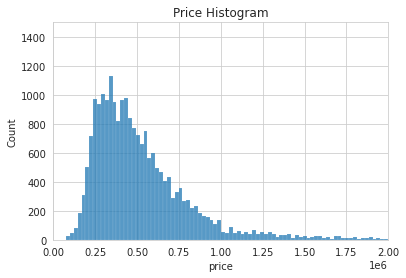

In [ ]:
sns.set_style("whitegrid")
g = sns.histplot(x=df['price'])
g = g.set(xlim=(0,2000000),ylim=(0,1500))
plt.title("Price Histogram")
# price data is right skewed with most values between (200,000 and 1,000,000)

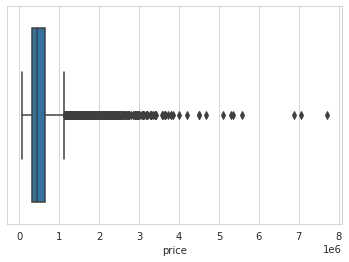

In [ ]:
sns.boxplot(data=df, x="price")
# There are many outliers that may affect our regression

In [ ]:
#removing outliers using iqr
Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
# testing how much data lose when removing outliers using iqr
print(df[df['price']<lower].shape[0] *100 / df['price'].shape[0],"% of lower data will be removed")
print(df[df['price']>upper].shape[0] *100 / df['price'].shape[0],"% of upper data will be removed")
# That's obvious from the boxplot

0.0 % of lower data will be removed
5.302364317771712 % of upper data will be removed


In [ ]:
# removing outliers
df = df.loc[df['price']<upper,:]


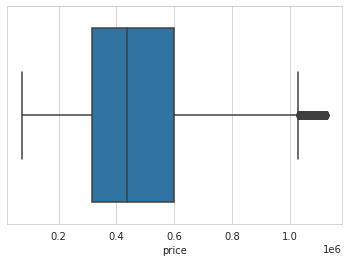

In [ ]:
sns.boxplot(data=df, x="price")

###Bedrooms column

In [ ]:
df['bedrooms'].value_counts()
# It's hard to get more than 8 bedrooms or 0 in one house so we should remove other data as it could be technical error or something

3     9597
4     6308
2     2736
5     1339
6      230
1      198
7       30
0       12
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

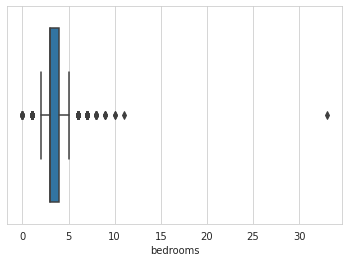

In [ ]:
sns.boxplot(data=df, x="bedrooms")

In [ ]:
df = df.loc[(df['bedrooms']<9) & (df['bedrooms']>0),:]

In [ ]:
df['bedrooms'].value_counts()

3    9597
4    6308
2    2736
5    1339
6     230
1     198
7      30
8       9
Name: bedrooms, dtype: int64

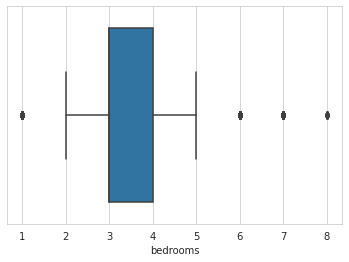

In [ ]:
sns.boxplot(data=df, x="bedrooms")

###Bathrooms column

In [ ]:
df['bathrooms'].value_counts()

2.50    5196
1.00    3849
1.75    3015
2.25    1958
2.00    1908
1.50    1435
2.75    1107
3.00     663
3.50     544
3.25     428
3.75      84
4.00      76
0.75      71
4.50      50
4.25      29
5.00       8
1.25       7
4.75       5
0.50       4
0.00       3
5.25       3
6.75       1
5.50       1
5.75       1
6.00       1
Name: bathrooms, dtype: int64

In [ ]:
df = df.loc[(df['bathrooms']<7) & (df['bathrooms']>=1),:]
# removing outliers

In [ ]:
# data with .25 in decimal
bath25 = df.loc[(df['bathrooms']-df['bathrooms'].astype(int)==0.25),'bathrooms']
# data with .5 in decimal
bath50 = df.loc[(df['bathrooms']-df['bathrooms'].astype(int)==0.5),'bathrooms']
# data with .75 in decimal
bath75 = df.loc[(df['bathrooms']-df['bathrooms'].astype(int)==0.75),'bathrooms']
# data with .0 in decimal
bath00 = df.loc[(df['bathrooms']-df['bathrooms'].astype(int)==0.0),'bathrooms']

In [ ]:
(bath25.shape[0]+bath50.shape[0]+bath75.shape[0]+bath00.shape[0]) - (df['bathrooms'].shape[0])

0

In [ ]:
# data with .25 decimal will be floored (eg. 2.25 will be 2)
bath25 = bath25.apply(np.floor)

# data with .75 decimal will be floored (eg. 2.75 will be 3)
bath75 = bath75.apply(np.ceil)

In [ ]:
# half of bath50 will be ceiled and the other half will be floored
lower50 = bath50[bath50.index<10805].apply(np.ceil)

higher50 = bath50[bath50.index>=10805].apply(np.floor)

In [ ]:
df.shape

(20369, 21)

In [ ]:
# concatinating all data
bathrooms = pd.concat([bath25, bath75,lower50,higher50,bath00], axis=1).fillna(0).sum(axis=1)

In [ ]:
bathrooms.value_counts()

2.00    10446
3.00     4919
1.00     4531
4.00      431
5.00       39
6.00        2
7.00        1
dtype: int64

In [ ]:
# old data
df['bathrooms'].value_counts()

2.50    5196
1.00    3849
1.75    3015
2.25    1958
2.00    1908
1.50    1435
2.75    1107
3.00     663
3.50     544
3.25     428
3.75      84
4.00      76
4.50      50
4.25      29
5.00       8
1.25       7
4.75       5
5.25       3
6.75       1
5.50       1
5.75       1
6.00       1
Name: bathrooms, dtype: int64

In [ ]:
# new data
df['bathrooms'] = bathrooms
df['bathrooms'] = df['bathrooms'].astype(int)
df['bathrooms'].value_counts()

2    10446
3     4919
1     4531
4      431
5       39
6        2
7        1
Name: bathrooms, dtype: int64

In [ ]:
df['bathrooms'].isna().sum()
# no nulls

0

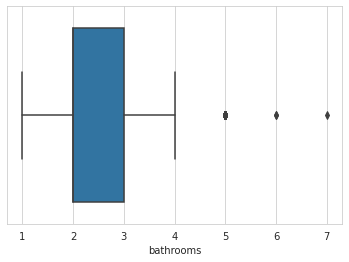

In [ ]:
sns.boxplot(data=df,x='bathrooms')

###sqft_living column

In [ ]:
df['sqft_living'].value_counts()

1300    137
1400    135
1440    131
1660    129
1800    129
       ... 
2251      1
2253      1
2192      1
1904      1
1425      1
Name: sqft_living, Length: 888, dtype: int64

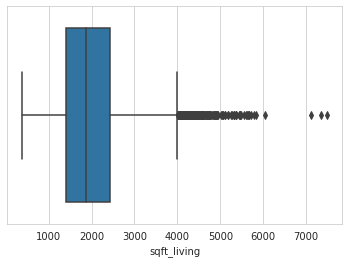

In [ ]:
sns.boxplot(data=df,x='sqft_living')

In [ ]:
#removing outliers from other columns
from scipy import stats
import numpy as np
other_columns = df.loc[:,'sqft_living':]
for i in other_columns.columns:
  z = np.abs(stats.zscore(df[i]))
  df['z'] = z
  if((z>3).sum() <1000):
    df = df.loc[df['z']<3,:]
  else:
    print("high number of outliers!!! at column",i)

high number of outliers!!! at column view


<ipython-input-771-a9e6816f7837>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z'] = z


high number of outliers at column view that needed to be treated

###'View' column

In [ ]:
df['view'].value_counts()

0    16937
2      625
3      242
1      236
4       66
Name: view, dtype: int64

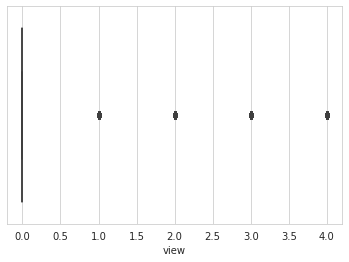

In [ ]:
sns.boxplot(x='view',data=df)

In [ ]:
# removing data with only 4 views
df = df.loc[df['view']<4,:]

In [ ]:
df.shape

(18040, 22)

##divariate analysis

KeyboardInterrupt: ignored

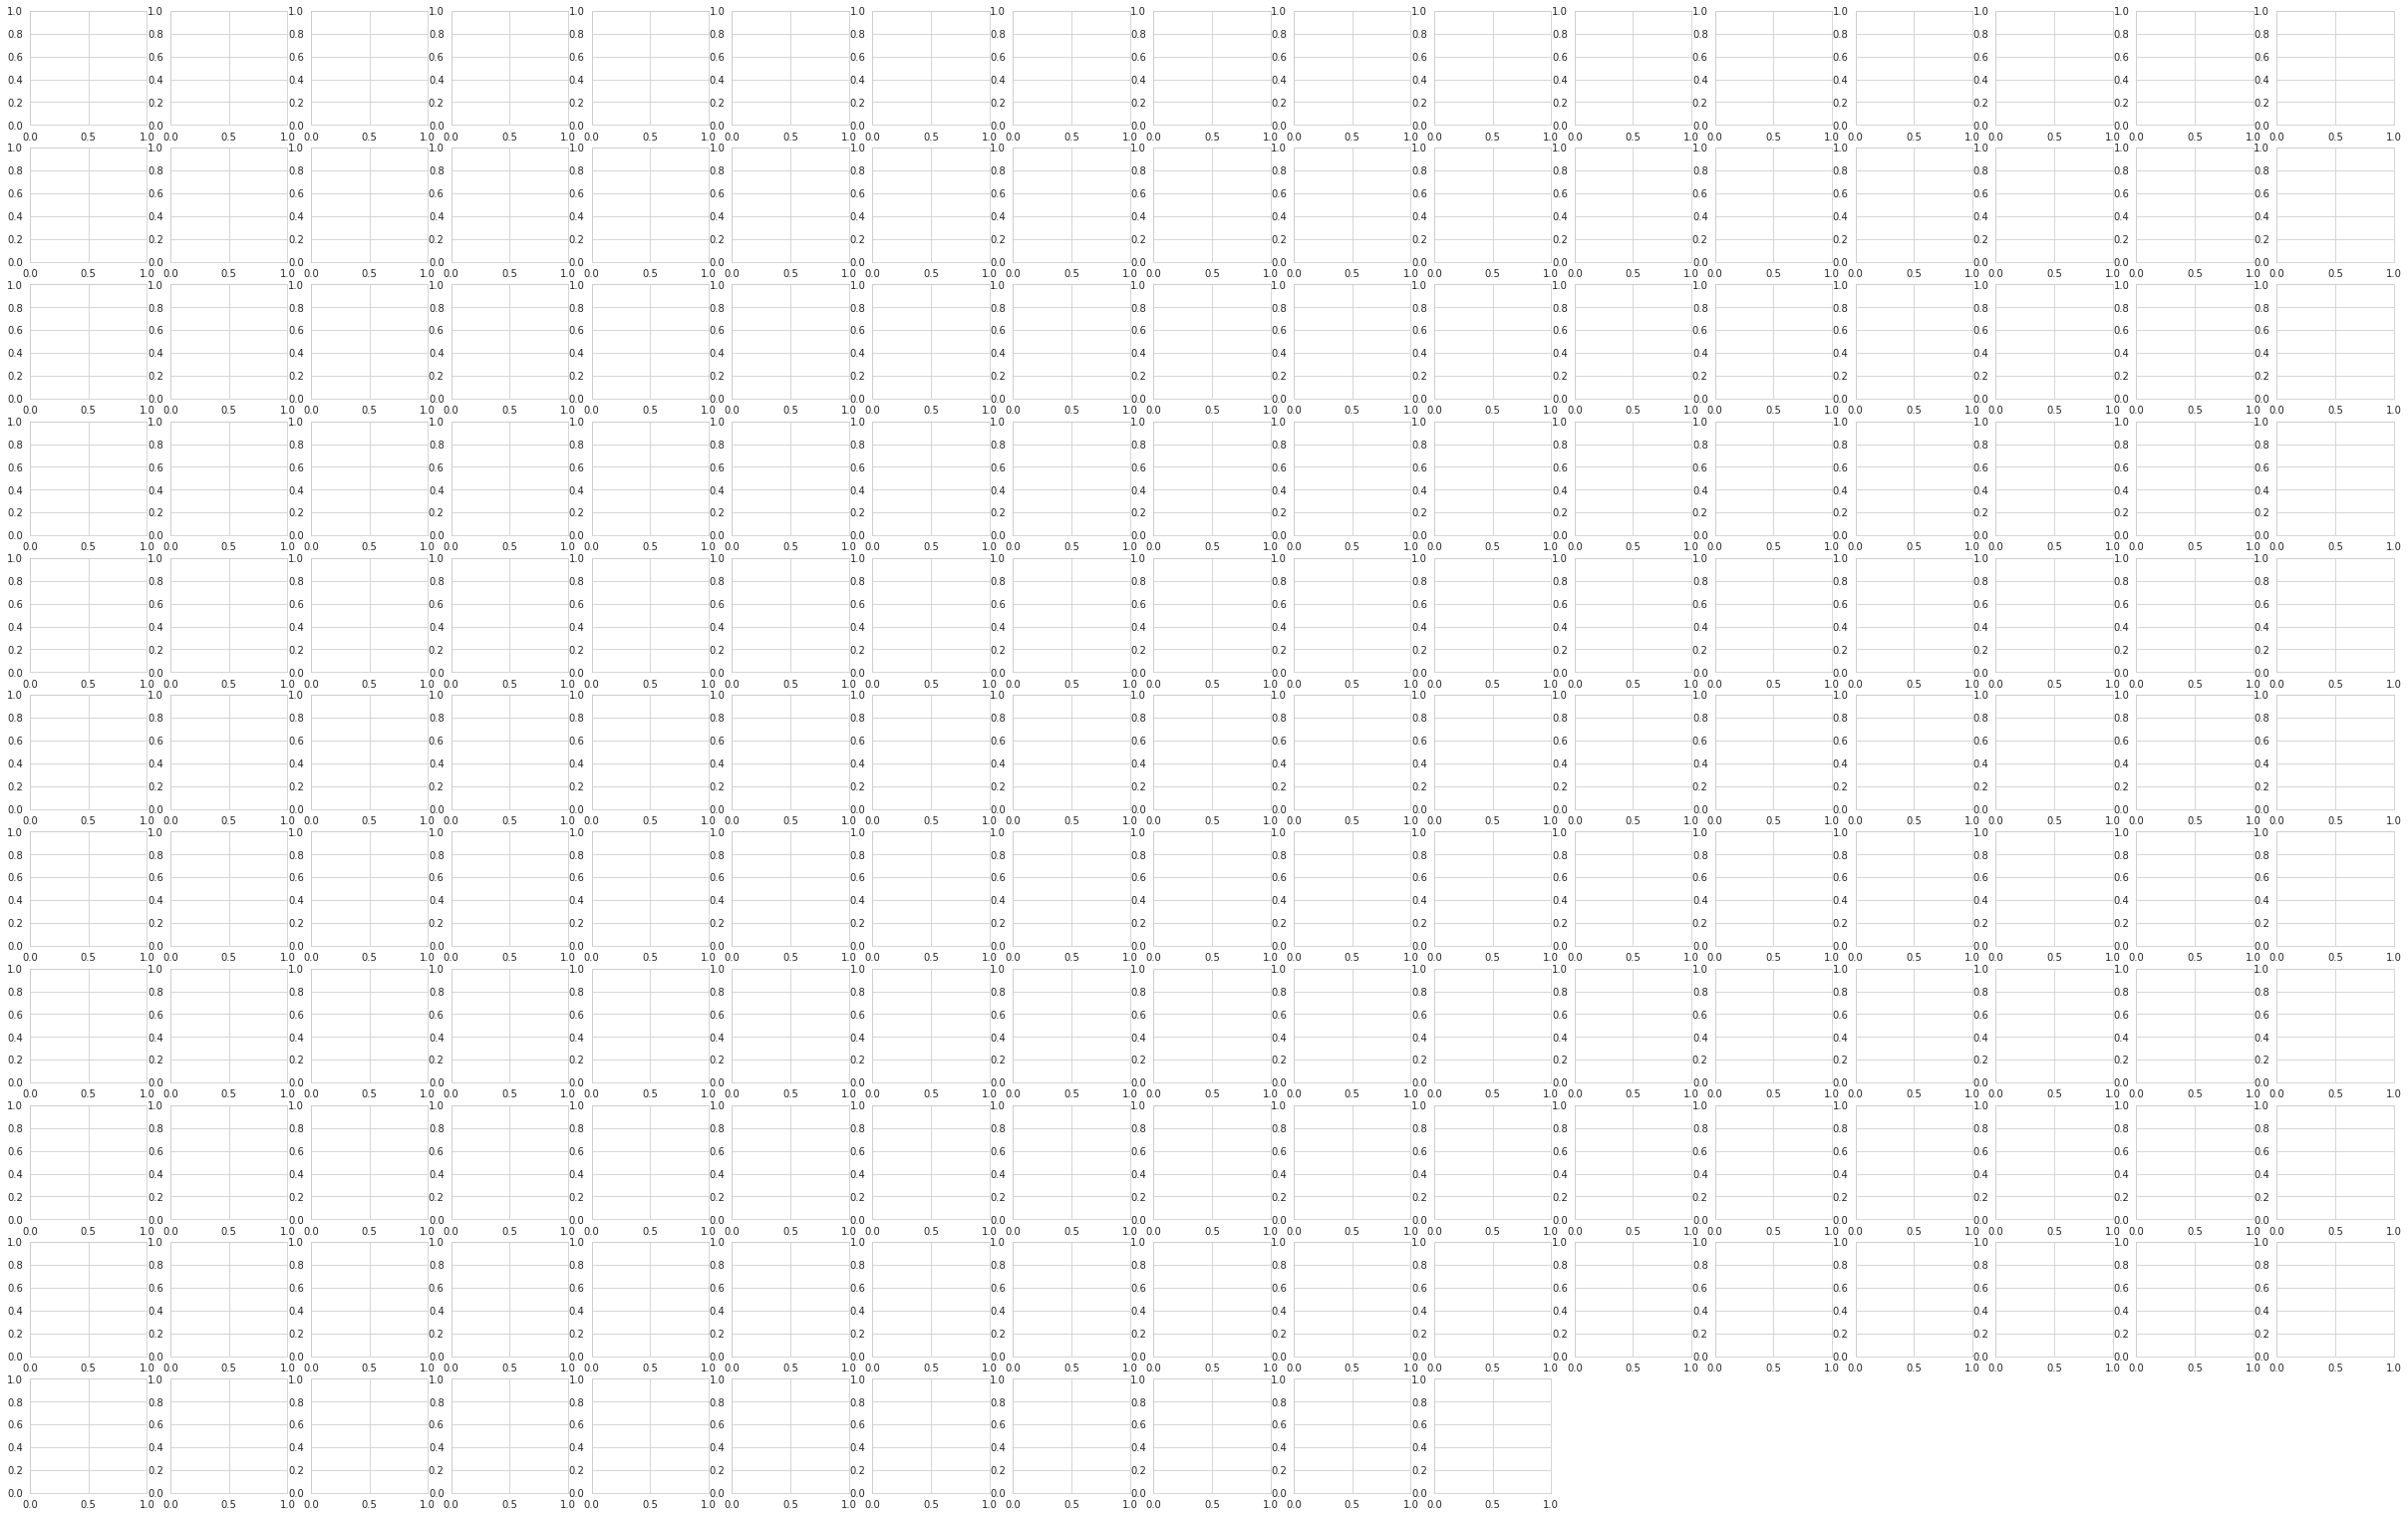

In [ ]:
#sns.pairplot(df)

from the pairplot: year enovated, water front are 0 in all data because of the outliers so we could remove them

In [ ]:
df.drop(columns=['id','waterfront','yr_renovated','z'],inplace=True)

In [ ]:
df.drop(columns=['date'],inplace=True)

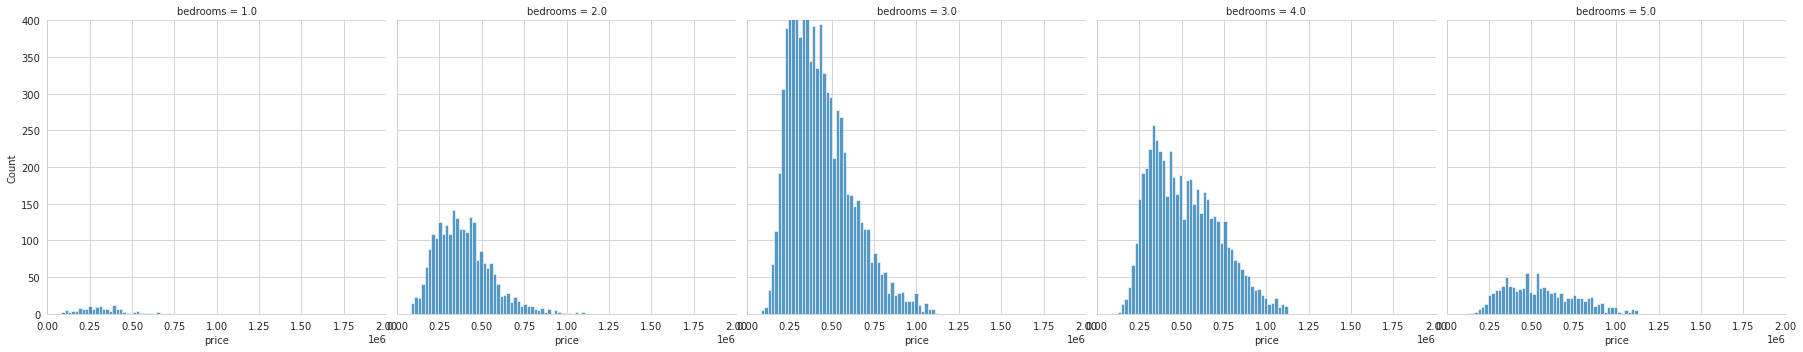

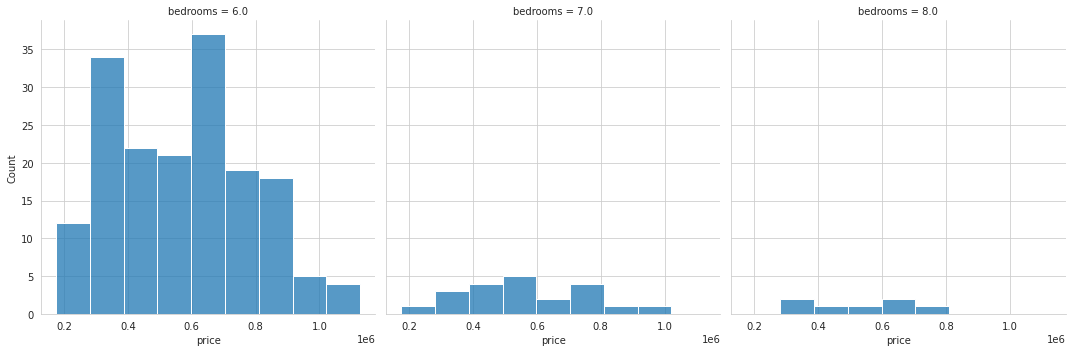

In [ ]:
# prices of bedrooms from 1 to 5
bed5= df[df['bedrooms']<6]['bedrooms']
g=sns.displot(x='price',data=df,col = bed5)
g = g.set(xlim=(0,2000000),ylim=(0,400))

# prices of bedrooms from 6 to end
bed_other= df[df['bedrooms']>5]['bedrooms']
g=sns.displot(x='price',data=df,col = bed_other)

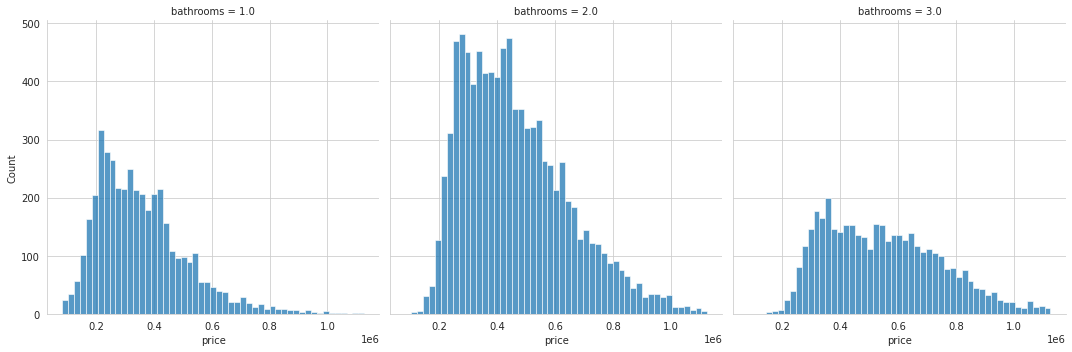

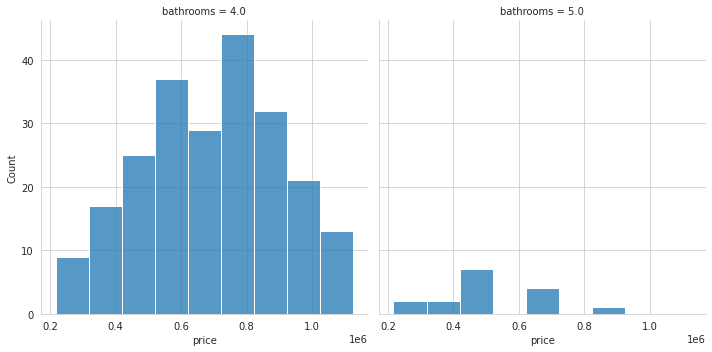

In [ ]:
# prices of bedrooms from 1 to 3
bath3= df[df['bathrooms']<4]['bathrooms']
g=sns.displot(x='price',data=df,col = bath3)

# prices of bedrooms from 3 to end
bath_others= df[df['bathrooms']>3]['bathrooms']
g=sns.displot(x='price',data=df,col = bath_others)

Bedrooms and bathrooms get little skewnes to the right when their numbers increase


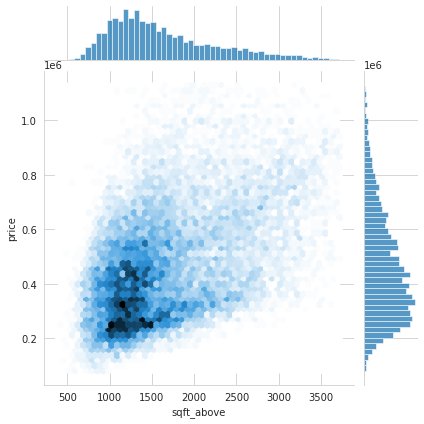

In [ ]:
sns.jointplot(x='sqft_above',y='price',data=df,kind='hex')

price gets obvious increase whent the above area increase

# Predictions

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X=df.drop('price',axis=1)
y=df['price']

In [ ]:
# Transforming our data to get ready fitting the model
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)

In [ ]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
# creating the model
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# testing the model
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,poly_reg_y_predicted))
poly_reg_rmse

98034.41546342551

In [ ]:
sqft_basement = df['sqft_basement'].sample(5412)
sample_y =y.sample(5412)

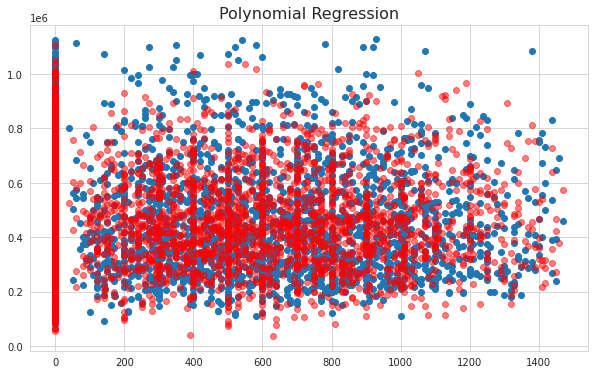

In [ ]:
# plotting example of sqft basement predictions vs real data
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
plt.scatter(sqft_basement,sample_y)
plt.scatter(sqft_basement, poly_reg_y_predicted, c="red",alpha=0.5)
plt.show()

#clustering price data

Determining number of clusters

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# transforming data using minmaxscaler
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

# fitting data to the kmean
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
  

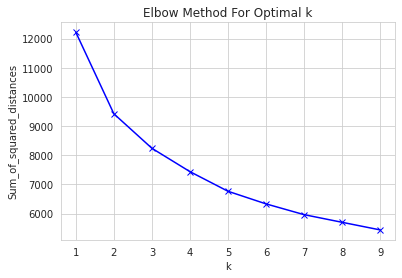

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# we would cluster them into 3 categories

###Clustering data

In [ ]:
#getting centroids
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
centroids.shape

[[ 5.03860007e+05  3.32870303e+00  2.09021787e+00  1.95389662e+03
   9.12788346e+03  1.51045474e+00  1.24433397e-01  3.40839304e+00
   7.58283375e+00  1.65989838e+03  2.93998245e+02  1.97147580e+03
   9.80817390e+04  4.76211580e+01 -1.22219915e+02  1.91626817e+03
   8.37517195e+03]
 [ 7.82330286e+05  3.69235550e+00  2.41827222e+00  2.54571566e+03
   1.06421603e+04  1.66454319e+00  3.07333748e-01  3.52765693e+00
   8.37445618e+00  2.18722654e+03  3.58489124e+02  1.97160783e+03
   9.80762166e+04  4.76286819e+01 -1.22210459e+02  2.35338782e+03
   9.48466221e+03]
 [ 2.91004985e+05  3.13015157e+00  1.80145309e+00  1.58028135e+03
   8.58837718e+03  1.35393962e+00  4.65990229e-02  3.39571590e+00
   6.99987473e+00  1.40985607e+03  1.70425279e+02  1.97096994e+03
   9.80790856e+04  4.74773662e+01 -1.22234157e+02  1.63511813e+03
   8.05739108e+03]]


(3, 17)

Visualising clustered data with the price

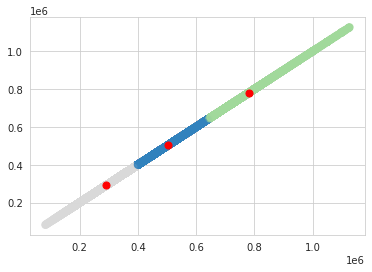

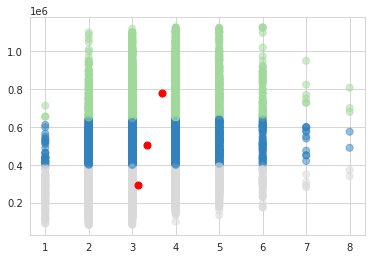

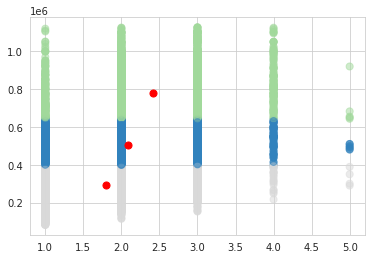

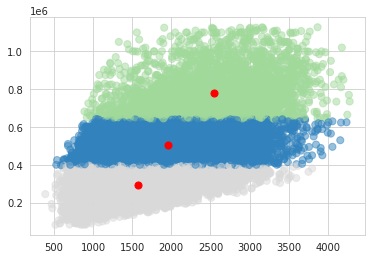

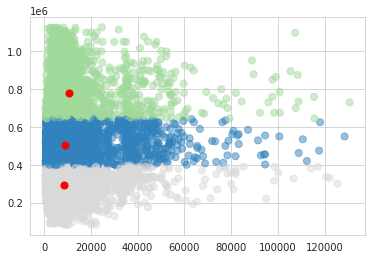

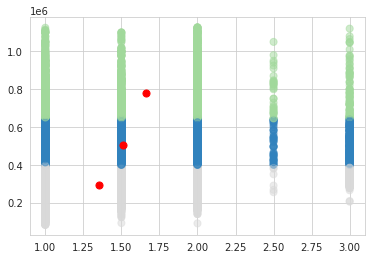

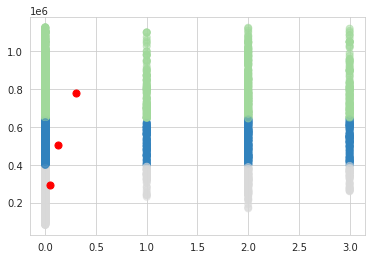

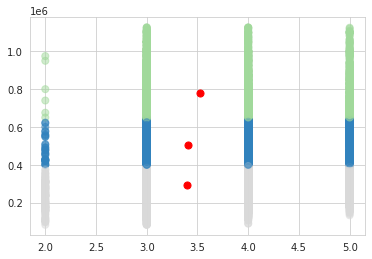

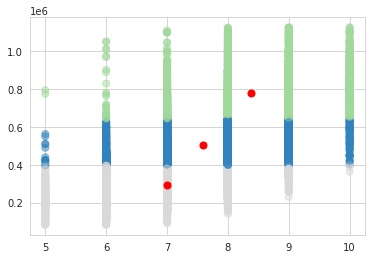

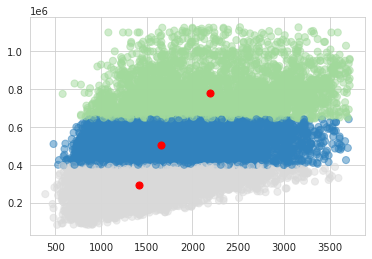

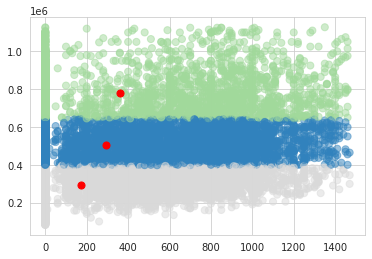

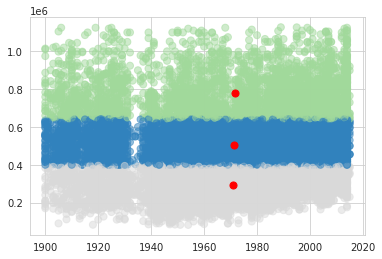

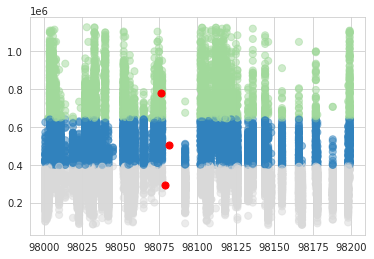

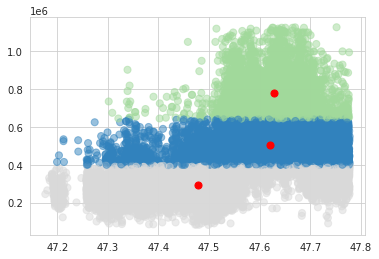

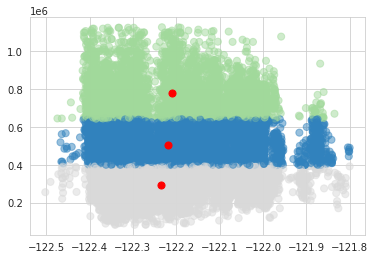

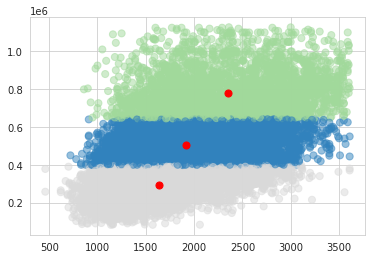

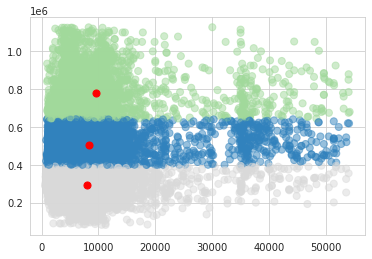

IndexError: ignored

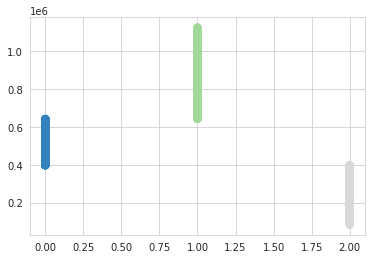

In [ ]:
for i in df.columns:
  plt.scatter(df[i], df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5,cmap='tab20c')
  plt.scatter(centroids[:, df.columns.get_loc(i)], centroids[:, 0], c='red', s=50)
  plt.show()

Adding clusters column to df

In [ ]:
PredictedClusters= kmeans.predict(df)
df['clusters'] = PredictedClusters
df['clusters'].value_counts()

2    7983
0    6843
1    3214
Name: clusters, dtype: int64

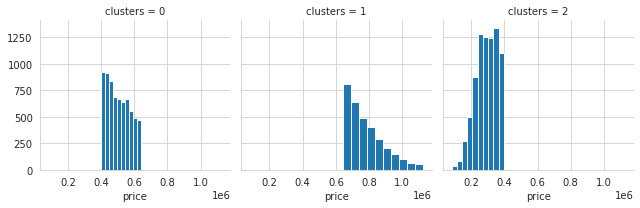

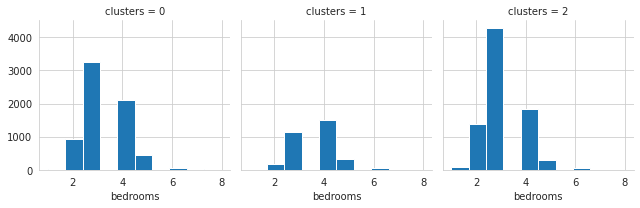

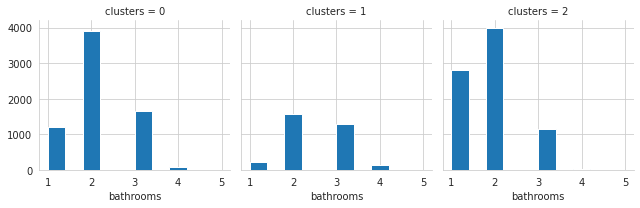

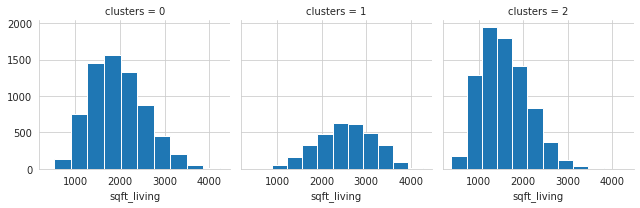

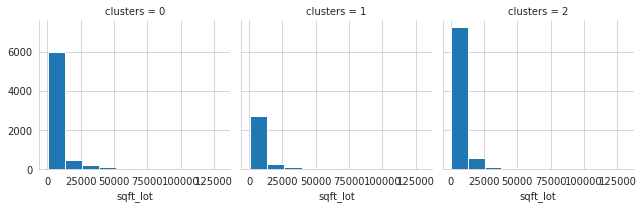

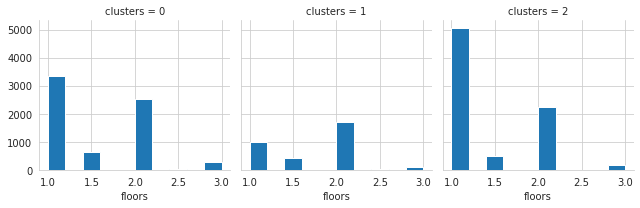

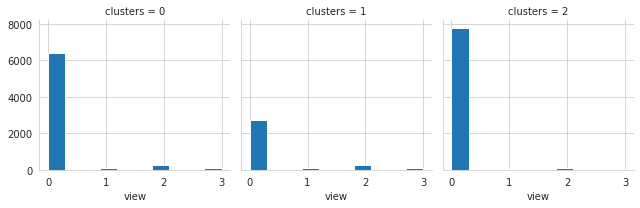

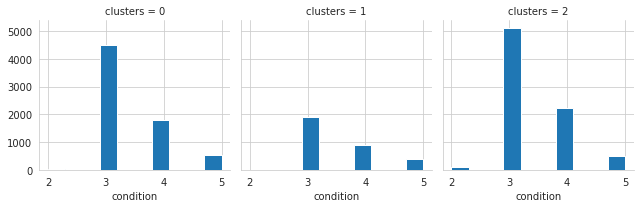

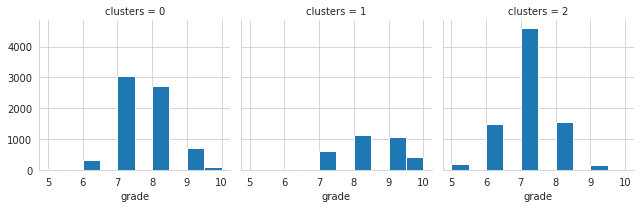

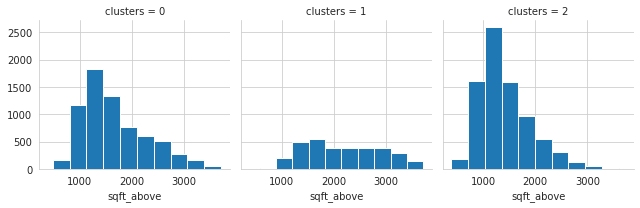

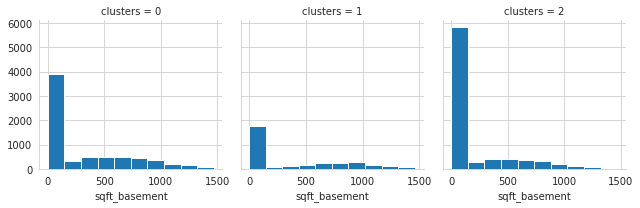

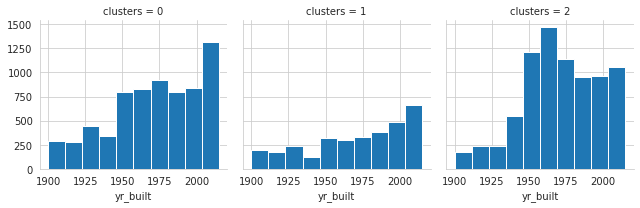

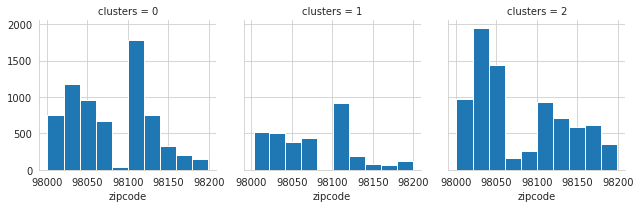

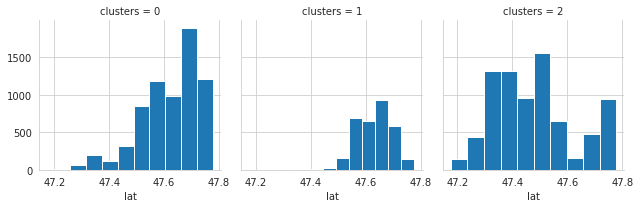

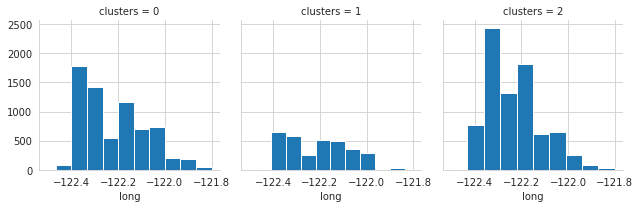

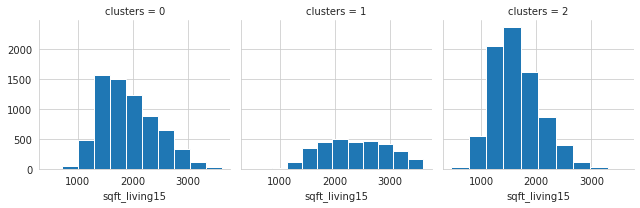

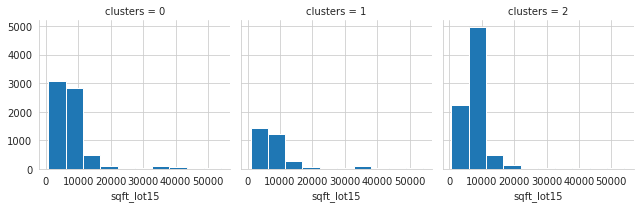

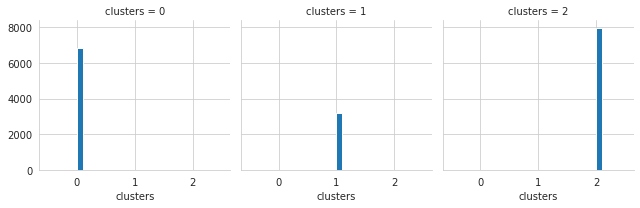

In [ ]:
for c in df:
    g= sns.FacetGrid(df , col='clusters')
    g.map(plt.hist, c)

Applying classification on the new column

In [ ]:
from sklearn.linear_model import LogisticRegression
X=df.drop('clusters',axis=1)
y=df['clusters']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
classifier = LogisticRegression(random_state = 5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1361,    1,    1],
       [   0,  634,    0],
       [   0,    0, 1611]])

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1363
           1       1.00      1.00      1.00       634
           2       1.00      1.00      1.00      1611

    accuracy                           1.00      3608
   macro avg       1.00      1.00      1.00      3608
weighted avg       1.00      1.00      1.00      3608



In [ ]:
# Using method to get accuracy of model
score = classifier.score(X_test, y_test)
print(score)

0.9994456762749445


#Conclusion

1. Time column had to be changed to datetime data type
2. Bedrooms had some unlogical values such as 33 bedrooms in one house
3. bathrooms was float that had decimal values such as 2.5, 3.75 that had to be treated with
4. many other values had outliers
5. After dealing with data, data fitted in the polonomial model to predict the price column
6. 3 categories was the best number suitable to cluster our data
7. after visualizing the clustered data we found many insights 


Houses are clustered into 3 groups according to their price.

> from 100000 to 400000 which is the lowest class.

> from 400000 to 600000 which is the medium class.

> from 600000 to 1000000 which is the highest class.

* 3 bedrooms are the most common number of bedrooms in all clusters.
* The area of living it's mean is in the highest in the medium category and not in the highest which is impressive.
* The most number of floors in all classes are 1 floor
* Most common grade in medium, highest categories are gade 7
* Many houses doesn't contain basement
